In [ ]:
pwd

In [1]:
import sys
#import tes.data as sim
from tes.data import PacketStream, Data, Distribution
#from tes.filesets import measurement_subsystem_TB as fileset
#import tes.simulation.plot as splt
import numpy as np
import matplotlib.pyplot as plt
import math
import collections
#from bokeh.plotting import figure, show
#from bokeh.io import output_notebook
#output_notebook()
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


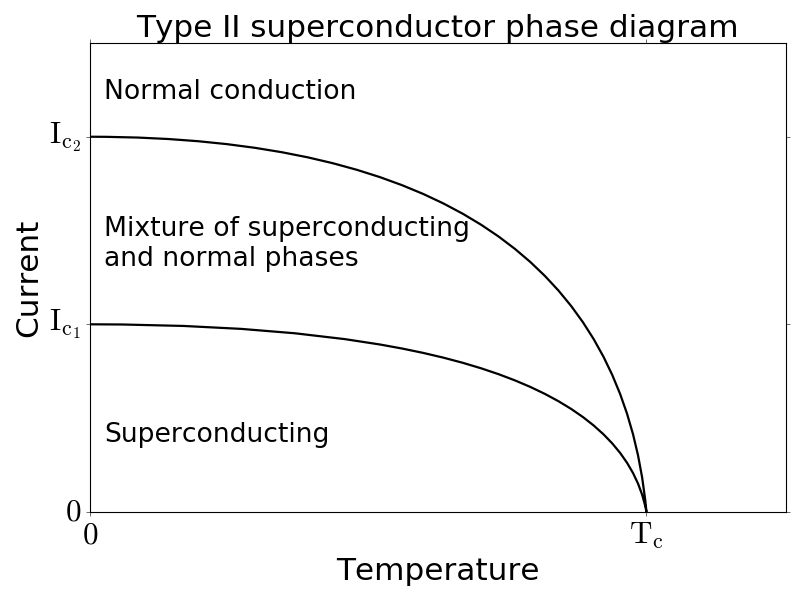

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
plt.rcParams["figure.figsize"]=[800./80,600./80]

def critical_patch(c1,c2,tc):

    vertices = np.array([
        (0., c2),
        (0.75, c2),
        (tc, 0.),
        (0.75, c1),
        (0., c1)
    ])

    codes = [Path.MOVETO,
             Path.CURVE3,
             Path.CURVE3,
             Path.CURVE3,
             Path.CURVE3,
             ]

    return patches.PathPatch(Path(vertices, codes),facecolor='none',lw=2)

crit_patch = critical_patch(0.4,0.8,0.8)


#plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.add_patch(crit_patch)

ax.tick_params(axis='x',colors='black',direction='out')
ax.tick_params(axis='y',colors='black',direction='out')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.xticks([0,0.8],('$0$','$\mathrm{T}_\mathrm{c}$'),fontsize=28)
plt.yticks([0,0.4,0.8],('$0$','$\mathrm{I}_{\mathrm{c}_1}$','$\mathrm{I}_{\mathrm{c}_2}$'),
           fontsize=28)
plt.title('Type II superconductor phase diagram',fontsize=28)
plt.xlabel('Temperature',fontsize=28)
plt.ylabel('Current',fontsize=28)

plt.text(0.02,0.15,'Superconducting',fontsize=24)
plt.text(0.02,0.88,'Normal conduction',fontsize=24)
plt.text(0.02,0.46,'Mixture of superconducting\nand normal phases\n',fontsize=24)

plt.tight_layout()

plt.show()
plt.savefig('..\\typeIIsuperconductor.svg')

<IPython.core.display.Javascript object>


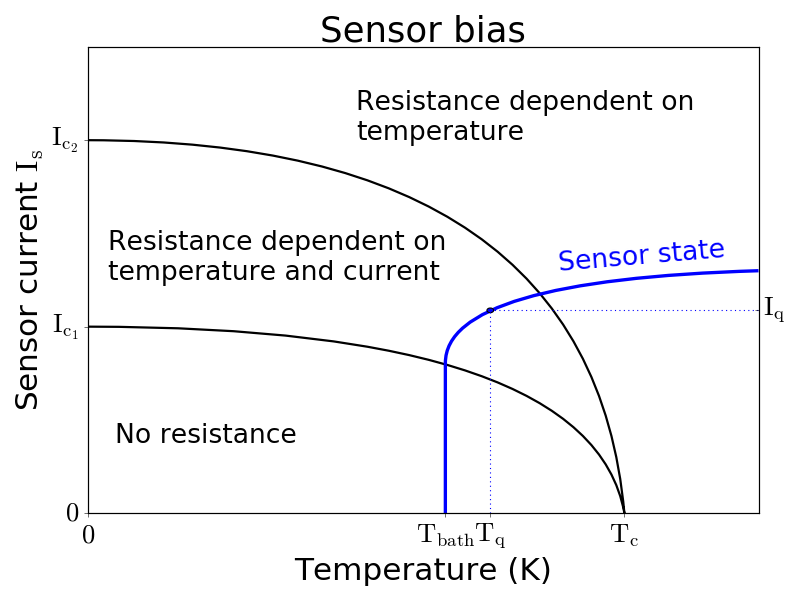

In [12]:
bias_verts = [
    (0.533,0),
    (0.533,0.322),
    (0.533,0.5),
    (1.0,0.52)
]

codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3
]

bias_codes = [Path.MOVETO,
              Path.LINETO,
              Path.CURVE3,
              Path.CURVE3
             ]

#plt.xkcd()

bias_path = Path(bias_verts, bias_codes)
fig = plt.figure()
ax = fig.add_subplot(111)
crit_patch = critical_patch(0.4,0.8,0.8)

ax.add_patch(crit_patch)
bias_patch=patches.PathPatch(bias_path,facecolor='none',edgecolor='blue',lw=3)
ax.add_patch(bias_patch)
#ax.add_patch(patches.Arrow(.533,.1,0,.1,width=.05))

bias_xy=[0.6,0.435]
bias_point=patches.Ellipse(bias_xy,0.01,0.01)
ax.add_patch(bias_point)

ax.tick_params(axis='x',colors='black',direction='out')
ax.tick_params(axis='y',colors='black',direction='out')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.xticks([0,0.533,bias_xy[0],0.8],('$0$', '$\mathrm{T}_\mathrm{bath}$', '$\mathrm{T}_\mathrm{q}$', 
                                     '$\mathrm{T}_\mathrm{c}$'),fontsize=24)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.yticks([0,0.4,0.8],('$0$','$\mathrm{I}_{\mathrm{c}_1}$',
                                   '$\mathrm{I}_{\mathrm{c}_2}$'),fontsize=24)
plt.title('Sensor bias',fontsize=32)
plt.xlabel('Temperature (K)',fontsize=28)
plt.ylabel('Sensor current $\mathrm{I}_\mathrm{s}$',fontsize=28)

plt.text(0.4,0.8,'Resistance dependent on\ntemperature',fontsize=24)
plt.text(0.03,0.5,'Resistance dependent on\ntemperature and current',fontsize=24)
plt.text(0.04,0.15,'No resistance',fontsize=24)
plt.text(0.7,0.55,'Sensor state',rotation=4.8,fontsize=24,color='b')
plt.plot([bias_xy[0], 1],[bias_xy[1], bias_xy[1]],':b')
plt.plot([bias_xy[0], bias_xy[0]], [0, bias_xy[1]],':b')
#plt.text(.55,.13,'$\mathrm{I}_{\mathrm{s}}$',fontsize=24)
axr = ax.twinx()
axr.set_yticks([bias_xy[1]])
axr.set_yticklabels(('$\mathrm{I}_\mathrm{q}$',),fontsize=24)
plt.tight_layout()

plt.savefig('..//sensorbias.svg')

plt.show()


<IPython.core.display.Javascript object>


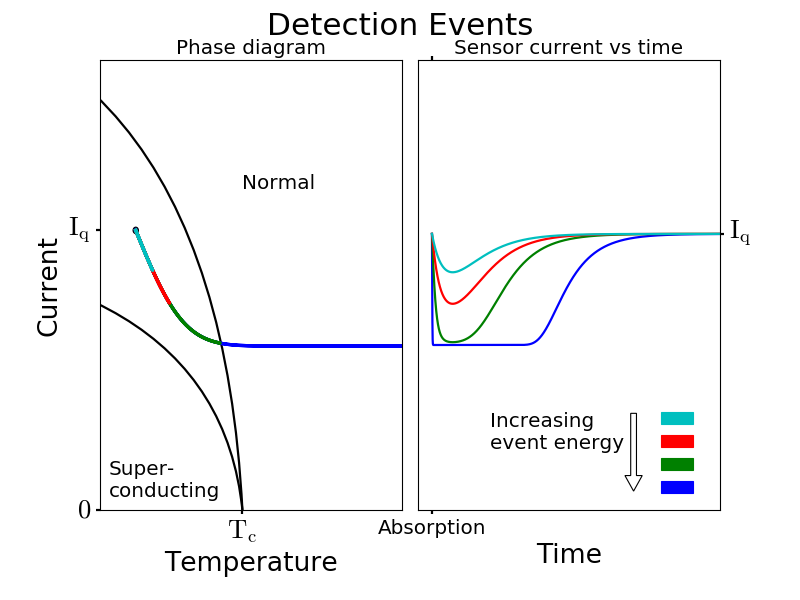

In [99]:
# cycle slide
import matplotlib.gridspec as gridspec
from scipy.special import erf as erf

verts1 = [
    (0., 0.8),  # P0
    (0.75, 0.8), # P1
    (0.8, 0.), # P3
    ]

verts2 = [
    (0., 0.4),  # P0
    (0.75, 0.4), # P1
    (0.8, 0.), # P3
    ]

bias_verts = [
    (0.533,0),
    (0.533,0.322),
    (0.533,0.5),
    (1.0,0.6)
]

codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3
]

bias_codes = [Path.MOVETO,
              Path.LINETO,
              Path.CURVE3,
              Path.CURVE3
             ]

#plt.xkcd()
path1 = Path(verts1, codes)
path2 = Path(verts2, codes)
bias_path = Path(bias_verts, bias_codes)
fig = plt.figure()

gs = gridspec.GridSpec(2, 2)

ax=plt.subplot(gs[:,0])

patch1 = patches.PathPatch(path1, facecolor='none', edgecolor='black', lw=2)
ax.add_patch(patch1)
patch2 = patches.PathPatch(path2, facecolor='none', edgecolor='black', lw=2)
ax.add_patch(patch2)

bias_point=patches.Ellipse(bias_xy,0.01,0.01)
ax.add_patch(bias_point)

ax.tick_params(axis='x', colors='black', direction='out', width=2)
ax.tick_params(axis='y', colors='black', direction='out', width=2)

ax.set_xlim(0.533,1.1)
ax.set_ylim(0, 0.7)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xticks([0.8],('$\mathrm{T}_\mathrm{c}$',),fontsize=24)
ax.title.set_text('Phase diagram')
ax.title.set_fontsize(18)
plt.yticks([0, bias_xy[1]],('$0$', '$\mathrm{I}_\mathrm{q}$',),fontsize=24)

fig.suptitle('Detection Events',fontsize=28)
plt.xlabel('Temperature', fontsize=24)
plt.ylabel('Current',fontsize=24)

plt.text(0.55,0.02,'Super-\nconducting',fontsize=18)
plt.text(0.8,0.5,'Normal',fontsize=18)

def clip(x,k):
    s=1
    return erf(x)

t=np.arange(0,10000)

res_verts = [
    (0.3,0.3),
    (0.3,0.4),
    (0.32,0.42),
    (0.3,0.44),
    (0.28,0.46),
    (0.3,0.48),
    (0.32,0.5),
    (0.3,0.52),
    (0.28,0.54),
    (0.3,0.56),
    (0.3,0.7), 
    (0.5,0.7),
    (0.5,0.56),
    (0.52,0.54),
    (0.5,0.52),
    (0.48,0.5),
    (0.5,0.48),
    (0.52,0.46),
    (0.5,0.44),
    (0.48,0.42),
    (0.5,0.4),
    (0.5,0.3),
    (0.3,0.3)
]

res_codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO
    ]

res_path = Path(res_verts, res_codes)

vb_verts = [
    (0.4,0.7),
    (0.4,0.82)
]

vb_codes = [
        Path.MOVETO,
        Path.LINETO
    ]
vb_path = Path(vb_verts,vb_codes)

e_verts = [
    (0.4,0.3),
    (0.4,0.2),
    (0.35,0.2),
    (0.45,0.2),
    (0.37,0.18),
    (0.43,0.18),
    (0.39,0.16),
    (0.41,0.16)
    
]

e_codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO
]
e_path = Path(e_verts, e_codes)

res_patch = patches.PathPatch(res_path, facecolor='none',edgecolor='black', lw=2)
vb_patch = patches.PathPatch(vb_path,facecolor='none', lw=2)
e_patch = patches.PathPatch(e_path,facecolor='none', lw=2)

x=t/10000
u=3.
v=4.
s=4
su=s*u
sv=s*v
y=(np.exp(-sv*x)-np.exp(-su*x))*1.5
k=5
ys=.18
xs=.1
plt.plot(-y*100*xs+bias_xy[0],clip(y*100,1)*ys+bias_xy[1],lw=3)
plt.plot(-y*10*xs+bias_xy[0],clip(y*10,1)*ys+bias_xy[1],lw=3)
plt.plot(-y*4*xs+bias_xy[0],clip(y*4,1)*ys+bias_xy[1],lw=3)
plt.plot(-y*2*xs+bias_xy[0],clip(y*2,1)*ys+bias_xy[1],lw=3)

ax2=plt.subplot(gs[:,1])
ax2.set_ylim(-2.05, 2)
ax2.set_xlim(-.05,1)
ax2.yaxis.tick_right()
ax2.title.set_text('Sensor current vs time')
ax2.title.set_fontsize(18)

gs.update(wspace=0.05,bottom=0.15)

plt.plot(x,clip(y*100,k)+bias_xy[1],lw=2)
plt.plot(x,clip(y*10,k)+bias_xy[1],lw=2)
plt.plot(x,clip(y*4,k)+bias_xy[1],lw=2)
plt.plot(x,clip(y*2,k)+bias_xy[1],lw=2)

plt.xticks([0],('Absorption',), fontsize=18)
plt.yticks([bias_xy[1]],('$\mathrm{I}_{\mathrm{q}}$',),fontsize=24)
plt.xlabel('Time',fontsize=24)
ax2.tick_params(axis='x', colors='black', direction='out', width=2)
ax2.tick_params(axis='y', colors='black', direction='out', width=2)

e1 = patches.Patch(color='c')
e2 = patches.Patch(color='r')
e3 = patches.Patch(color='g')
e4 = patches.Patch(color='b')
l=plt.legend(handles=[e1,e2,e3,e4],loc=4)
l.set_frame_on(False)
ax2.add_patch(patches.Arrow(0.7,-1.18,0,-0.7,width=0.1,facecolor='none'))
plt.text(0.2,-1.5,'Increasing\nevent energy',fontsize=18)

plt.savefig('..//detection.svg')
plt.show()


In [59]:
l.set_frame_on(False)

In [9]:
infile="..\\..\\..\\input_signals\long"
#b=np.loadtxt(infile, dtype='uint16', delimiter=',', converters={0:lambda s: int(s, 16)})
b=np.load("..\\..\\..\\input_signals\long.npy")

In [10]:
%matplotlib notebook
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset
def sig_plt(s,start=902000,width=2500):
    fig, ax = plt.subplots()

    t=np.arange(len(s))*4e-9*1000

    #ax.plot(t[0:-1:10],s[0:-1:10],'k')
    ax.step(t,s,'k')
    ax.set_xlabel('Time ms',fontsize=24)
    ax.set_ylabel('Voltage (Arbitary units)',fontsize=24)
    #plt.xticks(visible=False)
    #plt.yticks(visible=False)
    #ax.set_xlim(0,t[4000000])
    #start=902000
    #width=2500
    stop=start+width
    axins = fig.add_axes([.4, .45, .45, .4])
    axins.set_xlim(t[start],t[stop])
    axins.set_xticks([])
    axins.set_yticks([0])
    #axins.set_ylables(('0',))

    axins.step(t[start:stop],s[start:stop],'k')
    #axins.set_xlim(start,stop)

    #plt.savefig('..//raw.png')
    plt.show()


In [ ]:
trace_dt = np.dtype([('raw',np.int32),('filtered',np.int32),('slope',np.int32)])
traces=Data.fromfile('traces',trace_dt)

In [227]:
trace_dt = np.dtype([('raw',np.int32),('filtered',np.int32),('slope',np.int32),('baseline',np.int32)])
traces=Data.fromfile('.//data//traces',trace_dt)

In [228]:
start=902000
width=2500
delay=4400

<IPython.core.display.Javascript object>


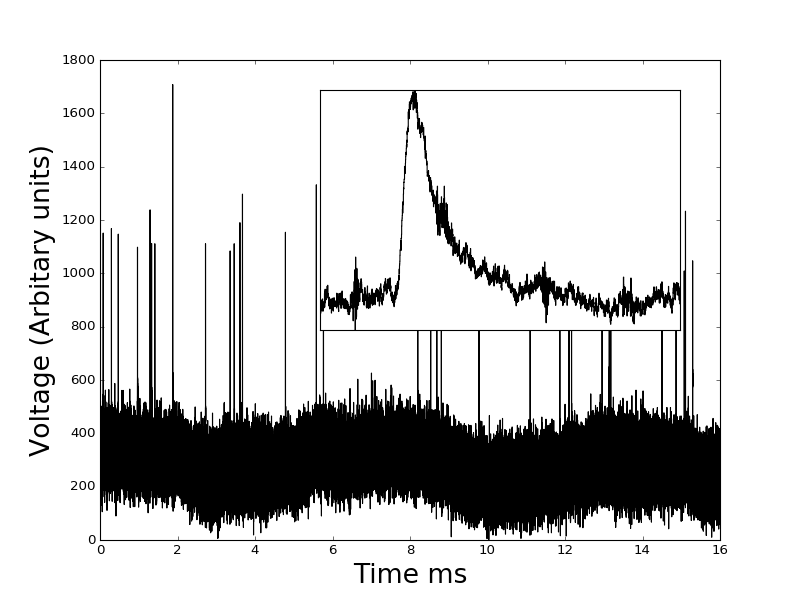

In [203]:
sig_plt(b[:4000000],start=start,width=width)
plt.savefig('..//input.png')


<IPython.core.display.Javascript object>


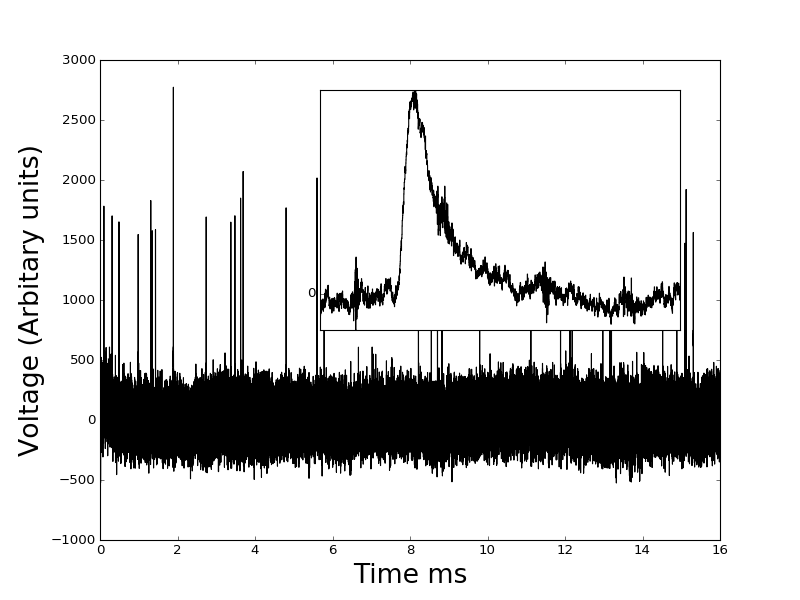

In [17]:
sig_plt(traces['raw'],start=start+delay,width=width)
plt.savefig('..//baselinecorrected.png')

<IPython.core.display.Javascript object>


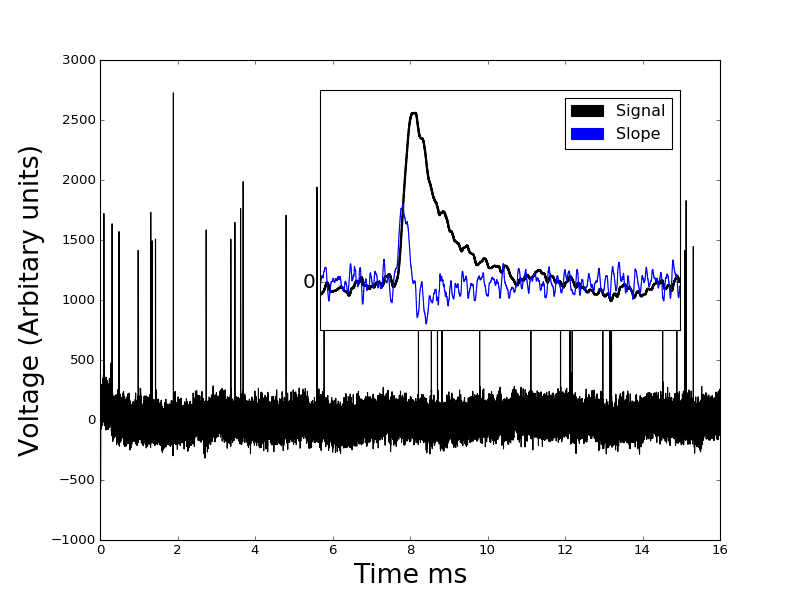

In [239]:
import matplotlib.patches as mpatches

s=traces['filtered']

fig, ax = plt.subplots()

t=np.arange(len(s))*4e-9*1000

#ax.plot(t[0:-1:10],s[0:-1:10],'k')
ax.plot(t,s,'k')
ax.set_xlabel('Time ms',fontsize=24)
ax.set_ylabel('Voltage (Arbitary units)',fontsize=24)
#plt.xticks(visible=False)
#plt.yticks(visible=False)
#ax.set_xlim(0,t[4000000])
#start=902000
#width=2500
stop=start+delay+width
axins = fig.add_axes([.4, .45, .45, .4])
axins.set_xlim(t[start+delay],t[stop])
axins.set_ylim(-500,2000)
axins.set_xticks([])
axins.set_yticks([0])
axins.set_yticklabels(['0'],fontsize=18)

axins.step(t[start+delay:stop],s[start+delay:stop],'k',lw=2)
axins.step(t[start+delay:stop],traces['slope'][start+delay:stop],'b')
filtered = mpatches.Patch(color='k', label='Signal')
slope = mpatches.Patch(color='b', label='Slope')

plt.legend(handles=[filtered, slope])

axins.legend([filtered, slope],['Signal', 'Slope'],loc=1)

#axins.set_xlim(start,stop)

plt.savefig('..//dsp.png')
plt.show()


<IPython.core.display.Javascript object>


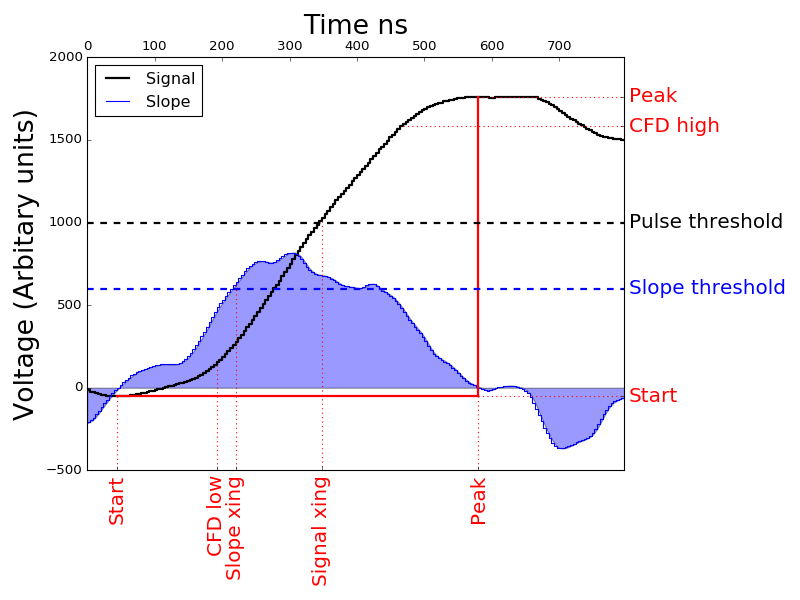

In [236]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
axr = ax.twinx()
axt = ax.twiny()
#ax.plot(t[0:-1:10],s[0:-1:10],'k')
#ax.plot(t,s,'k')
axt.set_xlabel('Time ns',fontsize=24)
ax.set_ylabel('Voltage (Arbitary units)',fontsize=24)
#plt.xticks(visible=False)
#plt.yticks(visible=False)
#ax.set_xlim(0,t[4000000])
#start=902000
#width=2500
pwidth=200
pstart=start+delay+500
pstop=pstart+pwidth
f=traces['filtered'][pstart:pstop]
s=traces['slope'][pstart:pstop]
t=np.arange(len(f))*4
#ts=t[pstart:pstop]
#axins = fig.add_axes([.4, .45, .45, .4])
ax.set_xlim(t[0],t[-1])
axt.set_xlim(t[0],t[-1])

ylim=(-500,2000)

ax.set_ylim(ylim[0],ylim[1])
axr.set_ylim(ylim[0],ylim[1])


filtered, = ax.step(t,f,'k',lw=2,label='filtered')
slope, = ax.step(t,s,'b',label='slope')
ax.fill_between(t,0,s,alpha=.4)
plt.ylim=ylim

pos=s>0
neg=s<=0
pos_xing_mask = np.bitwise_and(pos[1:-1],neg[0:-2])  
neg_xing_mask = np.bitwise_and(neg[1:-1],pos[0:-2])  
pos_xing=pos_xing_mask.nonzero()
neg_xing=neg_xing_mask.nonzero()

rx=[t[pos_xing[0][0]], t[neg_xing[0][0]]]
ry=[f[pos_xing[0][0]], f[neg_xing[0][0]]]

plt.plot(rx,[ry[0], ry[0]],'-r',lw=2)
plt.plot([rx[1],rx[1]], ry,'-r',lw=2)
# thresholds
sthresh = 600
pthresh = 1000
plt.plot([t[0], t[-1]], [sthresh, sthresh], '--b', lw=2)
plt.plot([t[0], t[-1]], [pthresh, pthresh], '--k', lw=2)

sthresh_xing=(s>sthresh).nonzero()[0][0]
pthresh_xing=(f>pthresh).nonzero()[0][0]


cf=.10
height = ry[1]-ry[0]
cfl=ry[0]+(height*cf)
cfh=ry[1]-(height*cf)

cfl_xing=(f>cfl).nonzero()[0][0]
cfd_low=f[cfl_xing]
cfh_xing=(f>cfh).nonzero()[0][0]
cfd_high=f[cfh_xing]

#plt.plot([t[cfl_xing], t[-1]],[cfd_low, cfd_low], ':r')
plt.plot([t[cfh_xing], t[-1]],[cfd_high, cfd_high], ':r')
plt.plot([rx[1], t[-1]],[ry[1], ry[1]], ':r')
plt.plot([rx[1], t[-1]],[ry[0], ry[0]], ':r')



plt.plot([rx[0], rx[0]],[ry[0], ylim[0]], ':r')
plt.plot([t[cfl_xing], t[cfl_xing]],[cfd_low, ylim[0]], ':r')
plt.plot([t[sthresh_xing], t[sthresh_xing]],[s[sthresh_xing], ylim[0]], ':r')
plt.plot([t[pthresh_xing], t[pthresh_xing]],[f[pthresh_xing], ylim[0]], ':r')
#plt.plot([t[cfh_xing], t[cfh_xing]],[cfd_high, ylim[0]], ':r')
plt.plot([rx[1], rx[1]],[ry[0], ylim[0]], ':r')
#plt.plot([t[cfh_xing], t[-1]],[cfd_high, cfd_high], ':r')
#plt.plot([x[1], t[-1]],[y[1], y[1]], ':r')
plt.legend([filtered, slope],['Signal', 'Slope'],loc=2)

#axr = ax.twinx()
axr.set_yticks([ry[0],sthresh,pthresh,cfd_high,ry[1]])
axr.set_yticklabels(['Start','Slope threshold','Pulse threshold','CFD high','Peak'],
                   color='r',fontsize=18)
axr.get_yticklabels()[1].set_color('b')
axr.get_yticklabels()[2].set_color('k')
ax.set_xticks([rx[0],t[cfl_xing],t[sthresh_xing],t[pthresh_xing],rx[1]])
ax.set_xticklabels(['Start','CFD low','Slope xing','Signal xing','Peak'],
                    rotation='vertical',color='r',fontsize=18)

plt.tight_layout()
plt.savefig('..//peakextraction.svg')
plt.show()


<IPython.core.display.Javascript object>


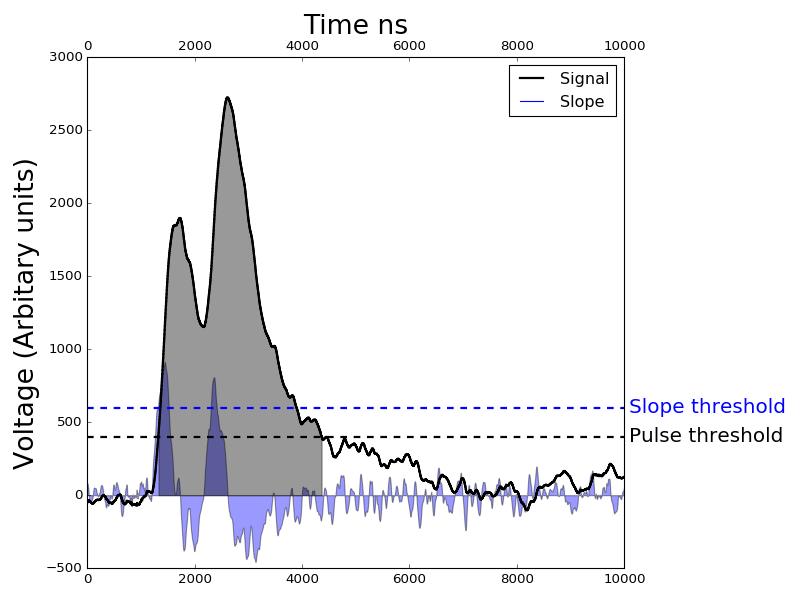

In [206]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
axr = ax.twinx()
axt = ax.twiny()
#ax.plot(t[0:-1:10],s[0:-1:10],'k')
#ax.plot(t,s,'k')
axt.set_xlabel('Time ns',fontsize=24)
ax.set_ylabel('Voltage (Arbitary units)',fontsize=24)
#plt.xticks(visible=False)
#plt.yticks(visible=False)
#ax.set_xlim(0,t[4000000])
#start=902000
#width=2500
pwidth=2500
pstart=472800
pstop=pstart+pwidth
f=traces['filtered'][pstart:pstop]
s=traces['slope'][pstart:pstop]
t=np.arange(len(f))*4
#ts=t[pstart:pstop]
#axins = fig.add_axes([.4, .45, .45, .4])
ax.set_xlim(t[0],t[-1])
axt.set_xlim(t[0],t[-1])

ylim=(-500,3000)

ax.set_ylim(ylim[0],ylim[1])
axr.set_ylim(ylim[0],ylim[1])


filtered, = ax.step(t,f,'k',lw=2,label='filtered')
#slope, = ax.step(t,s,'b',label='slope')
ax.fill_between(t,0,s,alpha=.4)
#plt.ylim=ylim

pos=s>0
neg=s<=0
pos_xing_mask = np.bitwise_and(pos[1:-1],neg[0:-2])  
neg_xing_mask = np.bitwise_and(neg[1:-1],pos[0:-2])  
pos_xing=pos_xing_mask.nonzero()
neg_xing=neg_xing_mask.nonzero()

rx=[t[pos_xing[0][0]], t[neg_xing[0][0]]]
ry=[f[pos_xing[0][0]], f[neg_xing[0][0]]]

#plt.plot(rx,[ry[0], ry[0]],'-r',lw=2)
#plt.plot([rx[1],rx[1]], ry,'-r',lw=2)

# thresholds
sthresh = 600
pthresh = 400
plt.plot([t[0], t[-1]], [sthresh, sthresh], '--b', lw=2)
plt.plot([t[0], t[-1]], [pthresh, pthresh], '--k', lw=2)

sthresh_xing=(s>sthresh).nonzero()[0][0]
pthresh_xing=(f>pthresh).nonzero()[0][0]
pthresh_nxing=(f>pthresh).nonzero()[0][-1]


ax.fill_between(t[pthresh_xing:pthresh_nxing],f[pthresh_xing:pthresh_nxing],0,alpha=.4,color='k')


cf=.10
height = ry[1]-ry[0]
cfl=ry[0]+(height*cf)
cfh=ry[1]-(height*cf)

cfl_xing=(f>cfl).nonzero()[0][0]
cfd_low=f[cfl_xing]
cfh_xing=(f>cfh).nonzero()[0][0]
cfd_high=f[cfh_xing]

#plt.plot([t[cfl_xing], t[-1]],[cfd_low, cfd_low], ':r')
#plt.plot([t[cfh_xing], t[-1]],[cfd_high, cfd_high], ':r')
#plt.plot([rx[1], t[-1]],[ry[1], ry[1]], ':r')
#plt.plot([rx[1], t[-1]],[ry[0], ry[0]], ':r')


#plt.plot([rx[0], rx[0]],[ry[0], ylim[0]], ':r')
#plt.plot([t[cfl_xing], t[cfl_xing]],[cfd_low, ylim[0]], ':r')
#plt.plot([t[sthresh_xing], t[sthresh_xing]],[s[sthresh_xing], ylim[0]], ':r')
#plt.plot([t[pthresh_xing], t[pthresh_xing]],[f[pthresh_xing], ylim[0]], ':r')
#plt.plot([t[cfh_xing], t[cfh_xing]],[cfd_high, ylim[0]], ':r')
#plt.plot([rx[1], rx[1]],[ry[0], ylim[0]], ':r')
#plt.plot([t[cfh_xing], t[-1]],[cfd_high, cfd_high], ':r')
#plt.plot([x[1], t[-1]],[y[1], y[1]], ':r')
plt.legend([filtered, slope],['Signal', 'Slope'],loc=1)

#axr = ax.twinx()
axr.set_yticks([sthresh,pthresh])
axr.set_yticklabels(['Slope threshold', 'Pulse threshold'],
                   color='r',fontsize=18)
axr.get_yticklabels()[0].set_color('b')
axr.get_yticklabels()[1].set_color('k')
#ax.set_xticks([rx[0],t[cfl_xing],t[sthresh_xing],t[pthresh_xing],rx[1]])
#ax.set_xticklabels(['Start','CFD low','Slope xing','Signal xing','Peak'],
#                    rotation='vertical',color='r',fontsize=18)

plt.tight_layout()

plt.show()


In [229]:


def sig_plt2(ax1,ax2,s,start=902000,width=2500):

    t=np.arange(len(s))*4e-9*1000

    ax1.step(t,s,'k')
    ax1.set_yticks([0])
    ax1.set_xticks([])
    ylim = ax1.get_ylim()
    stop=start+width
    ax2.set_xlim(t[start],t[stop])
    ax2.set_ylim(ylim[0],ylim[1])
    ax2.set_xticks([])
    ax2.set_yticks([0])

    ax2.step(t[start:stop],s[start:stop],'k',label='Signal')

    plt.show()


In [240]:
len(t)

4000000

<IPython.core.display.Javascript object>


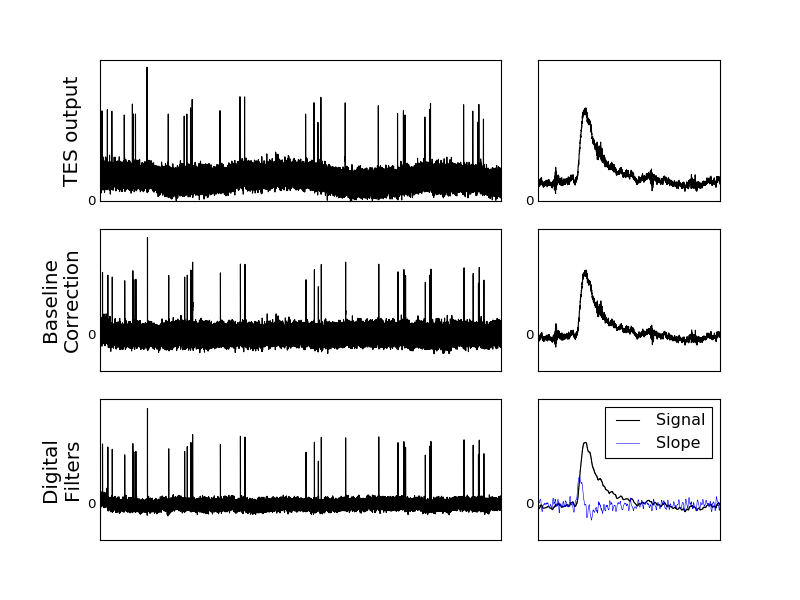

In [244]:
import matplotlib.gridspec as gridspec
fig=plt.figure()
#fig.xlabel='time'
gs = gridspec.GridSpec(3, 3)
plt.subplot(gs[0,0:2]).set_ylabel('TES output',fontsize=18)
plt.subplot(gs[1,0:2]).set_ylabel('Baseline\nCorrection',fontsize=18)
plt.subplot(gs[2,0:2]).set_ylabel('Digital\nFilters',fontsize=18)
ax2=plt.subplot(gs[0,2])
pstart=start+delay
sig_plt2(plt.subplot(gs[0,0:2]),plt.subplot(gs[0,2]),b[0:4000000])
sig_plt2(plt.subplot(gs[1,0:2]),plt.subplot(gs[1,2]),traces['raw'],start=pstart,width=width)
sig_plt2(plt.subplot(gs[2,0:2]),plt.subplot(gs[2,2]),traces['filtered'],pstart,width=width)
sax=plt.subplot(gs[2,2])
sax.step(t[pstart:pstart+width],traces['slope'][pstart:pstart+width],'b',label='Slope',lw=0.5)
sax.legend()
plt.savefig('..//pipeline.png')
plt.show()

In [393]:


def sig_dist(s,ax,col,ylim=(0,1900)):
    c=np.bincount(s,minlength=int(math.pow(2,14)))
    zmask=c!=0
    counts=np.zeros_like(c,dtype=np.double)
    counts[zmask]=np.log10(c[zmask])+1
    ax.plot(counts,np.arange(len(counts)),col)
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_yticks([])
    ax.set_xticklabels(['0','$10^0$','$10^1$','$10^2$','$10^3$','$10^4$'],fontsize=18)
    ax.set_xlabel('Count',fontsize=24)

<IPython.core.display.Javascript object>


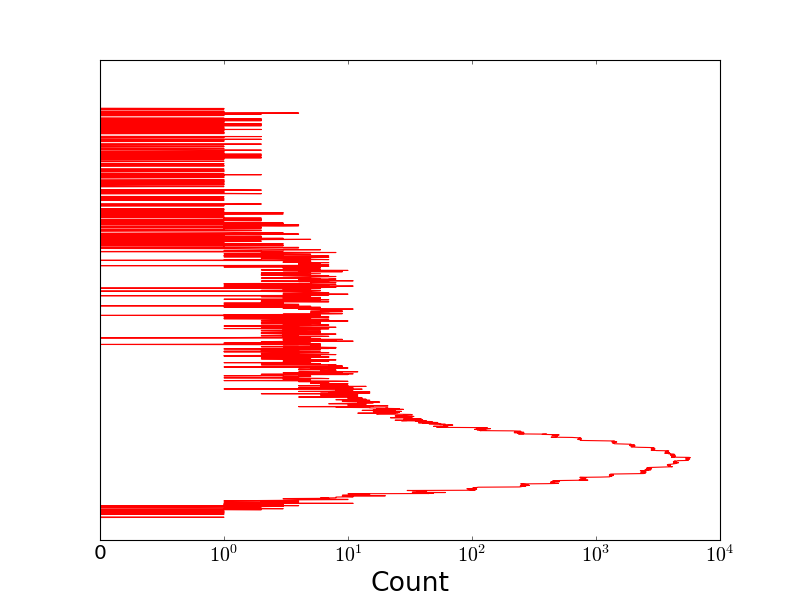

In [394]:
%matplotlib notebook
ax=ax = plt.subplot(111)
sig_dist(b[0:500000],ax,'r')

<IPython.core.display.Javascript object>


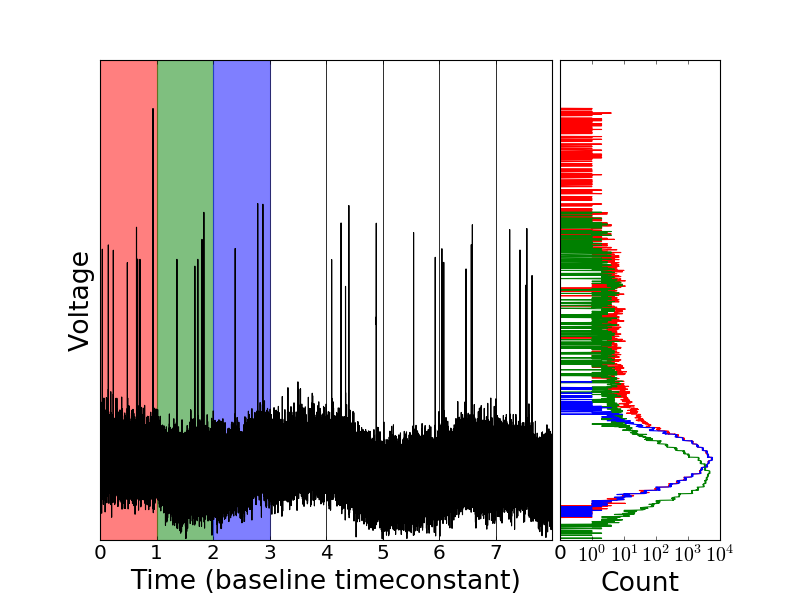

In [406]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

#gs = gridspec.GridSpec(1, 3)

tc = np.arange(0,1500000,500000)

ax = plt.subplot(111)
ylim=(0,1900)
ax.set_ylim(ylim[0],ylim[1])
plt.plot(b[0:4000000],'k')
div = make_axes_locatable(ax)
hax = div.append_axes("right", size=2, pad=0.1, sharey=ax)
sig_dist(b[0:500000],hax,'r',ylim)
sig_dist(b[500000:1000000],hax,'g',ylim)
sig_dist(b[1500000:2000000],hax,'b',ylim)

#hax.set_yticks([])
#hax.set_ylim(ylim[0],ylim[1])

#c = np.bincount(b[0:500000],minlength=int(pow(2,14)))
#c[c==0]=np.NaN
#hax.plot(c,np.arange(int(pow(2,14))),'r')
#c = np.bincount(b[500000:1000000],minlength=int(pow(2,14)))
#hax.plot(c,np.arange(int(pow(2,14))),'g')
#c = np.bincount(b[1000000:1500000],minlength=int(pow(2,14)))
#hax.plot(c,np.arange(int(pow(2,14))),'b')
#hax.set_xscale('log')
#hax.set_xticklabels(hax.get_xticklabels(),fontsize=18)
#c = np.bincount(b[1500000:2000000],minlength=int(pow(2,14)))
#hax.plot(np.log10(c),np.arange(int(pow(2,14))),'c')
#filtered = mpatches.Patch(color='r', label='Signal')

ax.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        500000,          # width
        ylim[1],          # height
        alpha=0.5,
        color='r',
        lw=None
    )
)

ax.add_patch(
    patches.Rectangle(
        (500000, 0),   # (x,y)
        500000,          # width
        ylim[1],          # height
        color='g',
        alpha=0.5,
        lw=None

    )
)

ax.add_patch(
    patches.Rectangle(
        (1000000, 0),   # (x,y)
        500000,          # width
        ylim[1],          # height
        color='b',
        alpha=0.5,
        lw=None
    )
)

ax.add_patch(
    patches.Rectangle(
        (1500000, 0),   # (x,y)
        500000,          # width
        ylim[1],          # height
        color='k',
        fill=None,
        lw=0.5
    )
)
ax.add_patch(
    patches.Rectangle(
        (2000000, 0),   # (x,y)
        500000,          # width
        ylim[1],          # height
        color='k',
        fill=None,
        lw=0.5
    )
)
ax.add_patch(
    patches.Rectangle(
        (2500000, 0),   # (x,y)
        500000,          # width
        ylim[1],          # height
        color='k',
        fill=None,
        lw=0.5
    )
)
ax.add_patch(
    patches.Rectangle(
        (3000000, 0),   # (x,y)
        500000,          # width
        ylim[1],          # height
        color='k',
        fill=None,
        lw=0.5
    )
)
ax.add_patch(
    patches.Rectangle(
        (3500000, 0),   # (x,y)
        500000,          # width
        ylim[1],          # height
        color='k',
        fill=None,
        lw=0.5
    )
)

#ax.set_xticks([0,500000,1000000,1500000,2000000,25000000,3000000])
ax.set_xticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000])
ax.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=18)

ax.set_xlabel('Time (baseline timeconstant)',fontsize=24)
ax.set_ylabel('Voltage',fontsize=24)
plt.savefig('..//baselineestimation.png')
plt.show()
#plt.plot(np.bincount(b[1000000:2000000]))
#plt.plot(np.bincount(b[2000000:3000000]))
#plt.plot(np.bincount(b[3000000:4000000]))


In [306]:

np.arange(0,2000000,500000)

array([      0,  500000, 1000000, 1500000])

<IPython.core.display.Javascript object>


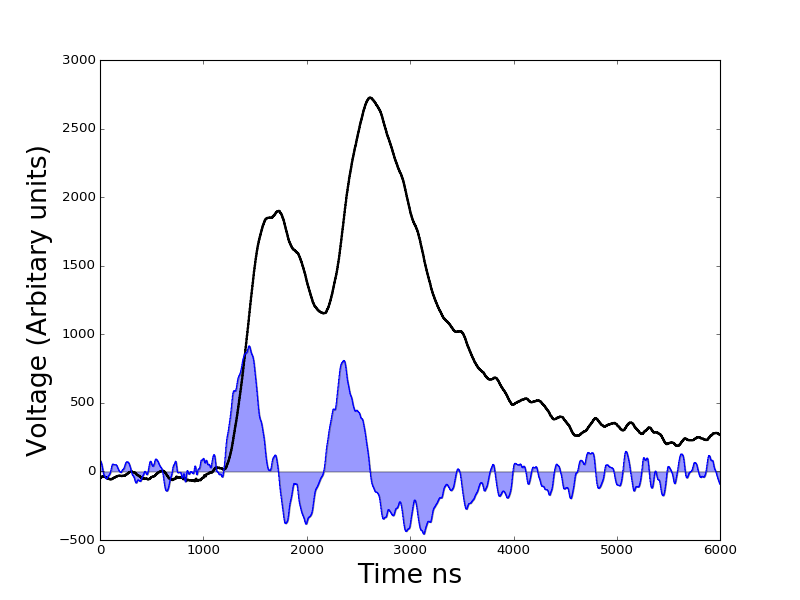

In [219]:
%matplotlib notebook


fig, ax = plt.subplots()

#ax.plot(t[0:-1:10],s[0:-1:10],'k')
#ax.plot(t,s,'k')
ax.set_xlabel('Time ns',fontsize=24)
ax.set_ylabel('Voltage (Arbitary units)',fontsize=24)
#plt.xticks(visible=False)
#plt.yticks(visible=False)
#ax.set_xlim(0,t[4000000])
#start=902000
#width=2500
pwidth=1500
pstart=472800
pstop=pstart+pwidth
f=traces['filtered'][pstart:pstop]
s=traces['slope'][pstart:pstop]
t=np.arange(len(f))*4
#ts=t[pstart:pstop]
#axins = fig.add_axes([.4, .45, .45, .4])
ax.set_xlim(t[0],t[-1])

ax.step(t,f,'k',lw=2)
ax.step(t,s,'b')
ax.fill_between(t,0,s,alpha=.4)
#axins.set_xlim(start,stop)

#plt.savefig('..//raw.png')
plt.show()


In [ ]:
pos=s>0
neg=s<=0
pos_xing_mask = np.bitwise_and(pos[1:-1],neg[0:-2])  
neg_xing_mask = np.bitwise_and(neg[1:-1],pos[0:-2])  
pos_xing=pos_xing_mask.nonzero()
neg_xing=neg_xing_mask.nonzero()
ax.plot(t[pos_xing[0]+1],np.zeros(len(pos_xing[0])),'ob')
ax.plot(t[neg_xing[0]+1],np.zeros(len(neg_xing[0])),'og')


In [ ]:
bs=Data.fromfile('bytestream',np.dtype([('data',np.uint32),('last',np.int32)]))
lasts = np.where(bs['last'] < 0)[0]
ps=PacketStream(bs)

In [ ]:
ds=ps.distributions

In [ ]:
d=ds[0]
high=d.lowest_value+(d.bins-2)*d.bin_width
x=np.arange(d.lowest_value,high,d.bin_width)

In [ ]:
d.counts[1:-1].dtype

In [ ]:
type(d.counts[1:-1])

In [ ]:
%matplotlib notebook
plt.step(x,d.counts[1:-1])
plt.xlim(-500,500)
plt.show()

In [ ]:
d.value

In [ ]:
d.start_time

In [ ]:
d.stop_time

In [ ]:


p = figure()
p.line(x=x,y=d.counts[1:-1])
show(p)

In [ ]:
d.total

In [ ]:
for p in ps.packets:
    if p.length != len(p.bytes):
        print("bad length frame:{:} header:{:} bytes:{:}".format(p.frame_sequence,p.length,len(p.bytes)))

In [ ]:
d[0].counts

In [ ]:
ps.packets[11].payload.view(np.uint32)

In [ ]:
ps.packets[11].bytes[32:40]

In [ ]:
%matplotlib notebook
for ds in d:
    plt.plot(np.arange(0,2000)/2,ds.counts[0:2000])
#plt.savefig('distribution.svg')
plt.show()

In [ ]:
d[1].counts

In [ ]:
%matplotlib notebook
ds=d[0]
plt.step(np.arange(1,2000)/2,ds.counts[1:2000])
#plt.savefig('distribution.svg')

In [ ]:
pwd

In [ ]:
trace_dt = np.dtype([('raw',np.int32),('filtered',np.int32),('slope',np.int32)])
traces=Data.fromfile('traces',trace_dt)

In [ ]:
q=b[10000:10000+int(math.pow(2,17))]
counts = np.bincount(q)


In [ ]:
%matplotlib notebook

plt.plot(counts)
plt.ylabel('frequency (count)')
plt.xlabel('ADC code')
plt.savefig('.//baseline_dist.svg')

In [ ]:
q=traces['slope'][10000:10000+int(math.pow(2,17))]
counts = np.bincount(q-min(q))


In [ ]:
q

In [ ]:
%matplotlib notebook
t=np.arange(len(b))*4e-9*1000
plt.plot(t[0,:,10],np.int16(b[0,:,10]),'k')
plt.xlabel('Time',fontsize=24)
plt.ylabel('Voltage (arbitary units)',fontsize=24)
plt.savefig('..//raw.svg')
plt.show()

In [ ]:
%matplotlib notebook
start=468000
stop=472000
t=np.arange(len(traces['raw']))*4e-9*1000
plt.plot(t,traces['raw']/2,'b')
plt.xlabel('Time (ms)')
plt.ylabel('code')
#plt.plot(traces['filtered'],'r',lw=2)
plt.show()
plt.savefig('.//baselinecorrected.svg')

In [ ]:
%matplotlib notebook
start=468000
stop=472000
t=np.arange(len(traces['filtered']))*4e-9*1000

plt.plot(t,traces['filtered']/2,'r')
plt.xlabel('Time (ms)')
plt.ylabel('ADC code')
#plt.plot(traces['filtered'],'r',lw=2)
plt.show()
plt.savefig('.//smoothed.svg')

In [ ]:
ps.packets

In [ ]:
len(ps.packets[8].bytes)

In [ ]:
lasts

In [ ]:
packets[0]

In [ ]:
bytestream['data'].dtype==np.uint32

In [ ]:
lasts = bytestream['last'].nonzero()[0] + 1
bpdt=np.dtype([('data',np.uint8),('pad',np.uint8,(3,))])
byte_data=bytestream['data'].view(bpdt)['data'].astype(np.uint8,copy=True)[0:lasts[-1]]


In [ ]:
'{:d}'.format(byte_data[14:16].view(np.uint16)[0])

In [ ]:
lasts = bytestream['last'].nonzero()[0] + 1
lasts

In [ ]:
lasts[-1]

In [ ]:
data=Data(fileset, 2, 'teslib','measurement_subsystem_TB')
enet=PacketStream(data.byte_stream)
dists=enet.distributions

In [ ]:
# compare transmitted distributions with the data
failed=False
if dists == []:
    print('No distributions')
else:
    for dist in dists:
        dif = (dist.counts - dist.data_counts(data))[0].nonzero()
        if dif[0].size:
            print(
                '{:}\nDoes not reconcile with the data, '+
                'Differences at {:d} indexs:\n{:}\n'.format(
                    dist, dif[0].size, dif[0])
            )
            failed=True
    if not failed:
        print('Distributions agree with data')
    


 ## work area

In [ ]:
enet.packets

In [ ]:
data.byte_stream

In [ ]:
%matplotlib notebook
plt.plot(data.trace[0]['raw'],'b',lw=0.5)
plt.plot(data.trace[0]['filtered'],'r',lw=1.5)

In [ ]:
enet.packets[4].payload[40:].view(np.uint32).size

In [ ]:
enet.packets[4].length

In [ ]:
dist=dists[1]
c=check_distribution(dist,data)
(c-dist.counts).nonzero()[0].size

In [ ]:
start=dist.start_time
stop=dist.stop_time+np.uint64(1)
s=data.slice((start, stop))
f = s.trace[dist.channel]['filtered']
fd = data.trace[dist.channel]['filtered'][start:stop]
(f-fd).nonzero()

In [ ]:
np.uint64(1)+np.uint64(-1)

In [ ]:
event_dt=np.dtype(
    (np.uint64, 
        [
            ('data', np.uint32),
            ('flags0', np.uint8),
            ('flags1', np.uint8),
            ('time',np.uint16)
        ] 
    )
)

peak_dt=np.dtype(
    (
        [
            ('height', np.int16),
            ('minima', np.int16),
            ('flags0', np.uint8),
            ('flags1', np.uint8),
            ('time',np.uint16)
        ] 
    )
)

tick_dt=np.dtype(
    ( 
        [
            ('period', np.uint32),
            ('flags0', np.uint8),
            ('flags1', np.uint8),
            ('time', np.uint16),
            ('timestamp', np.uint64)
        ]
    )
)

e = sim.EventStream('teslib','measurement_subsystem_TB')

events=e._stream64.view(dtype=event_dt)

#type_flags = np.bitwise_and(events['flags'],0x000f)
tick = np.bitwise_and(events['flags1'],0x02)!=0
window_start = np.bitwise_and(events['flags1'],0x01)!=0

tick_mask=np.zeros(len(tick),dtype=bool)
i=0
while (i < len(tick)):
    if tick[i]!=0:
        tick_mask[i:i+2]=True
        i+=1
    i+=1
    
peaks=e._stream64[~tick_mask].view(dtype=peak_dt)

ticks=e._stream64[tick_mask].view(dtype=tick_dt)

In [ ]:
d=distributions[0]


d.value.trace

In [ ]:
%matplotlib notebook
stop=distributions[0].stop_time
start=distributions[0].start_time
plt.plot(data.trace[0]['filtered'][start:stop])

In [ ]:
%matplotlib notebook
d=0
plt.plot(distributions[d].counts)

In [ ]:
p=1
lasts=enet['last'].nonzero()[0]+1
packets = []
prev=0
for last in lasts:
    packets.append(sim.Packet( np.copy(enet['data'][prev:last]).view(np.uint8)))
    prev=last

packets[:]

In [ ]:
packets[4]

In [ ]:
def get_distributions(packets):
    for packet in packets:
        if packet.payload_type == PayloadType.mca:
            
        
    
    
    
packets[4].payload[0:8].view(mca_header_dt)

In [ ]:
peaks=packets[1].payload.view(peak_dt)
peaks

In [ ]:

time=0
times=[]
heights=[]
minimas=[]

for p in packets:
    if p.payload_type==sim.EventType.tick:
        tick=p.payload.view(tick_dt)
        time=tick[0]['timestamp']
    elif p.payload_type==sim.EventType.peak:
        peaks=p.payload.view(peak_dt)
        for peak in peaks:
            time+=peak['time']
            times.append(time)
            heights.append(peak['height'])
            minimas.append(peak['minima'])
            

In [ ]:
times

In [ ]:
packets[1].payload.view(peak_dt)

In [ ]:
heights[0]

In [ ]:
%matplotlib notebook
p=3
x=np.arange(times[p]-300,times[p]+1000,dtype=np.uint64)
plt.plot([times[p], times[p]],[minimas[p], heights[p]],'r',lw=2)
plt.step(x,data.trace['filtered'][x])
plt.plot(data.peak[p/2],data.trace['filtered'][data.peak[p/2]],'ro')
plt.plot(
    [data.peak_start[p/2],times[p]],
    [data.trace['filtered'][data.peak_start[p/2]],data.trace['filtered'][data.peak_start[p/2]]],
    'k'
)
plt.plot(
    [times[p],data.peak[p/2]],
    [data.trace['filtered'][data.peak[p/2]],data.trace['filtered'][data.peak[p/2]]],
    'k'
)

In [ ]:
%matplotlib notebook
fig=simplt.plot_slice(data.slice((data.peak[0]-1000,data.peak[0]+1000)))
data.trace['filtered'][data.peak[0]]

In [ ]:
data.cfd_low

In [ ]:
packet_bytes=packet.view(np.uint8)

In [ ]:
packet_bytes

In [ ]:

payload

In [ ]:

payload_type

In [ ]:
time=payload[6:8].view(np.uint16)
time

In [ ]:

peaks

In [ ]:
payload[4+8:6+8]

In [ ]:
%matplotlib notebook
fig=simplt.plot_pulse(1,data)

In [ ]:
fig._axstack.as_list()[0]

In [ ]:
tick

In [ ]:
ticks

In [ ]:
window_start

In [ ]:
tick_mask

In [ ]:
e._stream64[tick_mask]

In [ ]:
type_flags[~tick_mask]

In [ ]:
type_flags = np.bitwise_and(events['flags'],0x000f)
peak_num = np.right_shift(np.bitwise_and(events['flags'],0x00f0),4)
channel = np.right_shift(np.bitwise_and(events['flags'],0x0f00),8)
event_type = np.right_shift(np.bitwise_and(events['flags'],0x3000),12)
tick=np.bitwise_and(type_flags,0x0002)

In [ ]:
ticks

In [ ]:
tick_mask

In [ ]:
events[tick_mask]

In [ ]:
time=np.bitwise_and(events[~tick_mask]['time'],0x7fff)
c_start=np.bitwise_and(events[~tick_mask]['time'],0x8000)!=0

In [ ]:
events[tick_mask]['time']

In [ ]:
time

In [ ]:
np.binary_repr(time[0],width=16)

In [ ]:
events[~tick_mask]['min']

In [ ]:
events[~tick_mask]['height']

In [ ]:
%matplotlib notebook
fig = simplt.plot_pulse(1,data,pre=500,length=3000)


In [ ]:
import pickle

# An arbitrary collection of objects supported by pickle.

pickler = pickle.Pickler(open('long.pickle', 'wb'),pickle.HIGHEST_PROTOCOL)
pickler.dump(data)


In [ ]:
unpickler = pickle.Unpickler(open('long.pickle', 'rb'))
reg2=unpickler.load()
data2=unpickler.load()

In [ ]:
data2.trace['slope']

In [ ]:
reg2

In [ ]:
axs = fig.get_axes()
pax=axs[0].parasites
pax[0]._label
f_ins_ax=axs[1]
s_ins_ax=f_ins_ax.parasites[0]

In [ ]:
es=sim.Data.fromfile('eventstream',np.int32,'teslib','measurement_unit_TB')

In [ ]:
es

In [ ]:
data.peak[-1]

In [ ]:
s.peak

In [ ]:
isinstance(r,sim.DataRegion)

In [ ]:
r.peak

In [ ]:
i

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(data.trace['filtered'])

In [ ]:
ax=plt.gca()
t=ax.transData
t.transform([[0.1,0.2],[1,3]])

In [ ]:
x=np.array([0,1,2,3])
y=np.array([3,4,5,6])

xy=np.empty(shape=(4,2))

In [ ]:
xy[:,0]=x
xy[:,1]=y
t.transform(xy)

In [ ]:
# run to import isim data files

import numpy as np
import os
import matplotlib.pyplot as plt
import math
from enum import Enum

plt.rcParams["figure.figsize"]=[800./80,600./80]

repo='c:\\TES_project\\fpga_ise\\'
project='teslib'
testbench='measurement_unit_TB'
datafile='traces'
path=repo+project+'\\PlanAhead\\'+project+'.sim\\'+testbench+'\\'

traces_dt = np.dtype([('input', np.int32),('raw',np.int32),('filtered',np.int32),('slope',np.int32)])
traces=np.fromfile(path+'traces',traces_dt)
trigger=np.fromfile(path+'triggers',np.int32)
settings=np.fromfile(path+'settings',np.int32)
cfd_low=np.fromfile(path+'cfdlow',np.int32)
cfd_high=np.fromfile(path+'cfdhigh',np.int32)
peaks=np.fromfile(path+'peaks',np.int32)
peaks.shape=(-1,2)
peak_starts=np.fromfile(path+'peak_starts',np.int32)
#peak_starts.shape=(-1,2)
pulse_starts=np.fromfile(path+'peak_starts',np.int32)
settings=np.fromfile(path+'settings',np.int32)
cfd_low=np.fromfile(path+'cfdlow',np.int32)
cfd_high=np.fromfile(path+'cfdhigh',np.int32)
slope_xing=np.fromfile(path+'slopethreshxings',np.int32)


In [ ]:
settings[13]

In [ ]:
#create register dict from settings array

class height_type(Enum):
    def from_int(value):
        if value == 0:
            return height_type.peak_height
        elif value == 1:
            return height_type.cfd_high
        elif value == 2:
            return height_type.slope_integral
        else:
            raise AttributeError()
    peak_height=0
    cfd_high=1
    slope_integral=2

class trigger_type(Enum):
    def from_int(value):
        if value == 0:
            return trigger_type.pulse_threshold
        elif value == 1:
            return trigger_type.slope_threshold
        elif value == 2:
            return trigger_type.cfd_low
        else:
            raise AttributeError()
    pulse_threshold=0
    slope_threshold=1
    cfd_low=2

class event_type(Enum):
    def from_int(value):
        if value == 0:
            return event_type.peak
        elif value == 1:
            return event_type.area
        elif value == 2:
            return event_type.pulse
        elif value == 3:
            return event_type.trace
        else:
            raise AttributeError()
    peak=0
    area=1
    pulse=2
    trace=3


def read_registers(settings):
    registers = dict()
    registers['baseline'] = dict()
    registers['baseline']['offset'] = settings[0]
    registers['baseline']['subtraction'] = settings[1]!=0
    registers['baseline']['timeconstant'] = settings[2]
    registers['baseline']['threshold'] = settings[3]
    registers['baseline']['count_threshold'] = settings[4]
    registers['generic'] = dict()
    registers['baseline']['average_order'] = settings[5]
    registers['capture'] = dict()
    registers['capture']['cfd_relative'] = settings[6]!=0
    registers['capture']['constant_fraction'] = settings[7]
    registers['capture']['pulse_threshold'] = settings[8]
    registers['capture']['slope_threshold'] = settings[9]
    registers['capture']['pulse_area_threshold'] = settings[10]
    registers['capture']['height_type'] = height_type.from_int(settings[11])
    registers['capture']['threshold_rel2min'] = settings[12]!=0
    registers['capture']['trigger_type'] = trigger_type.from_int(settings[13])
    registers['capture']['event_type'] = event_type.from_int(settings[14])
    return registers


In [ ]:
%matplotlib notebook
x=np.arange(len(traces['filtered']))
fig=plt.figure()

ax=fig.add_axes([0.15,0.1,0.8,0.8])
mV=1.0/math.pow(2,14)*1000
nS=4


i_trace, =ax.step(x*nS/1000000,(traces['input']+1800)*mV*2,'k',label='raw input')
f_trace, =ax.step(x*nS/1000000,traces['filtered']*mV,'b',label='processed')
fig.suptitle('Digital Signal Processing',fontsize=24)
plt.xlabel('time (ms)',fontsize=18)
plt.ylabel('Voltage (mV)',fontsize=18)
plt.legend(handles=[i_trace,f_trace])

fig.savefig('trace.png')
plt.show()

In [ ]:
%matplotlib notebook
import math

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)
    
x=np.arange(len(traces['filtered']))
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
plt.ylim(-10,120)
v=math.pow(2,13)/1000
t=x*4
ax.plot([0,t[-1]],[0,0],'k')
raw, = ax.step(t,traces['raw']/2/v,'k',lw=1,label='raw')
processed, = ax.step(t,traces['filtered']/2/v,'r',lw=2,label='processed')
ax.plot(trigger,traces['filtered'][trigger+1]/2,'kx')
ax.plot(peaks[:,0],traces['filtered'][peaks[:,0]+1]/2,'ro')
ax.plot(peak_starts,traces['filtered'][peak_starts+1]/2,'ro')
ax.plot(cfd_high,traces['filtered'][cfd_high+1]/2,'bs')
ax.plot(cfd_low,traces['filtered'][cfd_low+1]/2,'bs')
plt.xlabel('time (ns)',fontsize=18)
plt.ylabel('Voltage (mV)',fontsize=18,color='r')

ax2=ax.twinx()
slope, = ax2.step(t,traces['slope']/256/v/4,'b',lw=2,label='slope')
plt.xlim([1292000,1297500])
plt.ylim(-0.2,1)
align_yaxis(ax,0,ax2,0)
plt.ylabel('slope (mV/ns)',color='b',fontsize=18)
fig.suptitle('Digital signal processing',fontsize=24)
plt.legend(handles=[raw,processed,slope])
fig.savefig('dsp.png')
plt.show()

In [ ]:
%matplotlib notebook

#plot pulse
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

pulse=7
length=2000
pre=100

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)
    
start=pulse_starts[pulse]-pre
stop=start+length
x=np.arange(0,len(traces['filtered']))
fig=plt.figure()

f_ax = host_subplot(111)
s_ax = f_ax.twinx()

f_ax.set_xlabel("Time (ns)",fontsize=18)
f_ax.set_ylabel("Voltage (mV)",fontsize=18,color='r')
s_ax.set_ylabel("Slope (mv/ns)",fontsize=18,color='b')

mV=1.0/math.pow(2,14)*1000
nS=4
t=x*nS

f_sig = traces['filtered']*mV
s_sig = traces['slope']*mV/nS

f_ax.plot([t[start],t[stop]],[0,0],'k') # zero line
f_trace, = f_ax.step(t[start:stop],f_sig[start:stop],'r',lw=2,label='processed')
f_ax.set_ylim(-10,180)

s_trace, = s_ax.step(t[start:stop],s_sig[start:stop],'b',lw=1,label='slope')
s_ax.set_ylim(-15,50)
#s_threshold = 6
#s_ax.set_yticks(np.concatenate((s_ax.get_yticks(),[s_threshold])))
#labels=[label.get_text() for label in s_ax.get_yticklabels()]
#labels[6]='Threshold'

#s_ax.set_yticklabels(labels)
plt.xlim(t[start],t[stop])
align_yaxis(f_ax,0,s_ax,0)
fig.suptitle('Measurement:First pass',fontsize=24)
#plt.legend(handles=[f_trace,s_trace])

starts_mask = np.logical_and(peak_starts >= start,peak_starts <= stop)
peaks_mask = np.logical_and(peaks[:,0] >= start, peaks[:,0] <= stop)
peak_starts_inwin = peak_starts[starts_mask]

for pstart in peak_starts_inwin:
    peak_start_t=t[pstart]-2
    peak_start_f=f_sig[pstart]
    peak_start_s=s_sig[pstart]

    f_ax.plot(peak_start_t,peak_start_f,'ro')
    s_ax.plot(peak_start_t,peak_start_s,'bo')
    
    f_trans = f_ax.transData
    s_trans = s_ax.transData.inverted()
    trans = s_trans+f_trans
    f_point=f_trans.transform((peak_start_t,peak_start_f))
    s_point=s_trans.transform((f_point[0],f_point[1]))

    s_ax.plot([peak_start_t,peak_start_t],[peak_start_s, s_point[1]],'k')

#for p in peaks[0][peaks_inwin]
peaks_inwin = peaks[peaks_mask,0]
for p in peaks_inwin:
    peak_t=t[p]-2
    peak_f=f_sig[p]
    peak_s=s_sig[p]

    f_ax.plot(peak_t,peak_f,'ro')
    s_ax.plot(peak_t,peak_s,'bo')
    
    f_trans = f_ax.transData
    s_trans = s_ax.transData.inverted()
    trans = s_trans+f_trans
    f_point=f_trans.transform((peak_t,peak_f))
    s_point=s_trans.transform((f_point[0],f_point[1]))

    s_ax.plot([peak_t,peak_t],[peak_s, s_point[1]],'k')

ins_start = peak_starts_inwin[0]-5
ins_stop = peak_starts_inwin[0]+5
f_ins_ax = zoomed_inset_axes(f_ax, 50, loc=1)  # zoom = 6
f_ins_ax.step(t[ins_start:ins_stop],f_sig[ins_start:ins_stop],'r')
f_ins_ax.set_ylim(-0.5,2)
f_ins_ax.set_xlim(ins_start,ins_stop)
f_ins_ax.set_yticks([])
f_ins_ax.set_xticks([])

f_ins_ax.plot([t[ins_start],t[ins_stop]],[0,0],'k') # zero line

#plt.xticks(visible=False)
#plt.yticks(visible=False)
mark_inset(f_ax, f_ins_ax, loc1=2, loc2=4, fc="none", ec="0.5")

s_ins_ax = f_ins_ax.twinx()
s_ins_ax.set_yticks([])
s_ins_ax.set_xticks([])

s_ins_ax.step(t[ins_start:ins_stop],s_sig[ins_start:ins_stop],'b')

s_ins_ax.set_ylim(-1,1)
align_yaxis(f_ins_ax,0,s_ins_ax,0)

pstart = peak_starts_inwin[0]
peak_start_t=t[pstart]-2
peak_start_f=f_sig[pstart]
peak_start_s=s_sig[pstart]

f_ins_ax.plot(peak_start_t,peak_start_f,'ro')
s_ins_ax.plot(peak_start_t,peak_start_s,'bo')
    
f_trans = f_ins_ax.transData
s_trans = s_ins_ax.transData.inverted()
trans = s_trans+f_trans
f_point=f_trans.transform((peak_start_t,peak_start_f))
s_point=s_trans.transform((f_point[0],f_point[1]))

s_ins_ax.plot([peak_start_t,peak_start_t],[peak_start_s, s_point[1]],'k')

s_ax.plot([t[start],t[stop]],[s_threshold,s_threshold],ls='dashed')

fig.savefig('measurement1.png')
plt.draw()
plt.show()

In [ ]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

pulse=7
length=2000
pre=100

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)
    
start=pulse_starts[pulse]-pre
stop=start+length
x=np.arange(0,len(traces['filtered']))
fig=plt.figure()

f_ax = host_subplot(111)
s_ax = f_ax.twinx()

f_ax.set_xlabel("Time (ns)",fontsize=18)
f_ax.set_ylabel("Voltage (mV)",fontsize=18,color='r')
s_ax.set_ylabel("Slope (mv/ns)",fontsize=18,color='b')

mV=1.0/math.pow(2,14)*1000
nS=4
t=x*nS

f_sig = traces['filtered']*mV
s_sig = traces['slope']*mV/nS

f_ax.plot([t[start],t[stop]],[0,0],'k') # zero line
f_trace, = f_ax.step(t[start:stop],f_sig[start:stop],'r',lw=2,label='processed')
f_ax.set_ylim(-10,180)

s_trace, = s_ax.step(t[start:stop],s_sig[start:stop],'b',lw=1,label='slope')
s_ax.set_ylim(-15,50)
#s_threshold = 6
#s_ax.set_yticks(np.concatenate((s_ax.get_yticks(),[s_threshold])))
#labels=[label.get_text() for label in s_ax.get_yticklabels()]
#labels[6]='Threshold'

#s_ax.set_yticklabels(labels)
plt.xlim(t[start],t[stop])
align_yaxis(f_ax,0,s_ax,0)
fig.suptitle('Measurement:Second pass',fontsize=24)
#plt.legend(handles=[f_trace,s_trace])

starts_mask = np.logical_and(peak_starts >= start,peak_starts <= stop)
peaks_mask = np.logical_and(peaks[:,0] >= start, peaks[:,0] <= stop)
peak_starts_inwin = peak_starts[starts_mask]


#for pstart in peak_starts_inwin:
#    peak_start_t=t[pstart]-2
#    peak_start_f=f_sig[pstart]
#    peak_start_s=s_sig[pstart]
#
#    f_ax.plot(peak_start_t,peak_start_f,'ro')
#    s_ax.plot(peak_start_t,peak_start_s,'bo')
    
#    f_trans = f_ax.transData
#    s_trans = s_ax.transData.inverted()
#    trans = s_trans+f_trans
#    f_point=f_trans.transform((peak_start_t,peak_start_f))
#    s_point=s_trans.transform((f_point[0],f_point[1]))

#    s_ax.plot([peak_start_t,peak_start_t],[peak_start_s, s_point[1]],'k')

#for p in peaks[0][peaks_inwin]
peaks_inwin = peaks[peaks_mask,0]
x_s=peak_starts_inwin
x_p=peaks_inwin
y_s=f_sig[x_s]
y_p=f_sig[x_p]

f_ax.plot(t[peak_starts_inwin],f_sig[peak_starts_inwin],'or')
f_ax.plot(t[peaks_inwin],f_sig[peaks_inwin],'or')


f_ax.plot([t[x_s[0]],t[x_p[0]]],[y_s[0],y_s[0]],'k')
f_ax.plot([t[x_p[0]],t[x_p[0]]],[y_s[0],y_p[0]],'k')

f_ax.plot([t[x_s[1]],t[x_p[1]]],[y_s[1],y_s[1]],'k')
f_ax.plot([t[x_p[1]],t[x_p[1]]],[y_s[1],y_p[1]],'k')


#for p in peaks_inwin:
#    peak_t=t[p]-2
#    peak_f=f_sig[p]
#    peak_s=s_sig[p]

#    f_ax.plot(peak_t,peak_f,'ro')
#    s_ax.plot(peak_t,peak_s,'bo')
    
#    f_trans = f_ax.transData
#    s_trans = s_ax.transata.inverted()
#    trans = s_trans+f_trans
#    f_point=f_trans.transform((peak_t,peak_f))
#    s_point=s_trans.transform((f_point[0],f_point[1]))

#    s_ax.plot([peak_t,peak_t],[peak_s, s_point[1]],'k')

ins_start = peak_starts_inwin[1]-300
ins_stop = peak_starts_inwin[1]+500
f_ins_ax = zoomed_inset_axes(f_ax, 1.5, loc=1)  # zoom = 6
f_ins_ax.step(t[ins_start:ins_stop],f_sig[ins_start:ins_stop],'r')
f_ins_ax.set_ylim(60,180)
f_ins_ax.set_xlim(t[ins_start],t[ins_stop])
f_ins_ax.set_yticks([])
f_ins_ax.set_xticks([])

low_mask = np.logical_and(cfd_low >= start, cfd_low <= stop)
low_inwin = cfd_low[low_mask]
high_mask = np.logical_and(cfd_high >= start, cfd_high <= stop)
high_inwin = cfd_high[high_mask]
thresh_mask = np.logical_and(slope_xing >= start, slope_xing <= stop)
thresh_inwin = slope_xing[thresh_mask]

f_ins_ax.plot(t[peak_starts_inwin],f_sig[peak_starts_inwin],'or')
f_ins_ax.plot(t[peaks_inwin],f_sig[peaks_inwin],'or')

f_ins_ax.plot(t[low_inwin],f_sig[low_inwin],'ok')
f_ins_ax.plot(t[high_inwin],f_sig[high_inwin],'ok')
f_ax.plot(t[low_inwin],f_sig[low_inwin],'ok')
f_ax.plot(t[high_inwin],f_sig[high_inwin],'ok')
#f_ax.plot(t[thresh_inwin],f_sig[thresh_inwin],'ow')
f_ins_ax.plot(t[thresh_inwin],f_sig[thresh_inwin],'ow')


f_ins_ax.plot([t[x_s[0]],t[x_p[0]]],[y_s[0],y_s[0]],'k')
f_ins_ax.plot([t[x_p[0]],t[x_p[0]]],[y_s[0],y_p[0]],'k')

f_ins_ax.plot([t[x_s[1]],t[x_p[1]]],[y_s[1],y_s[1]],'k')
f_ins_ax.plot([t[x_p[1]],t[x_p[1]]],[y_s[1],y_p[1]],'k')

#f_ins_ax.plot([t[ins_start],t[ins_stop]],[0,0],'k') # zero line

#plt.xticks(visible=False)
#plt.yticks(visible=False)
#mark_inset(f_ax, f_ins_ax, loc1=2, loc2=4, fc="none", ec="0.5")

pstart = peak_starts_inwin[1]
peak_start_t=t[pstart]-2
peak_start_f=f_sig[pstart]
peak_start_s=s_sig[pstart]

f_ins_ax.plot(peak_start_t,peak_start_f,'ro')


f_trans = f_ins_ax.transData
s_trans = s_ins_ax.transData.inverted()
trans = s_trans+f_trans
f_point=f_trans.transform((peak_start_t,peak_start_f))
s_point=s_trans.transform((f_point[0],f_point[1]))

s_ins_ax.plot([peak_start_t,peak_start_t],[peak_start_s, s_point[1]],'k')

s_ax.plot([t[start],t[stop]],[s_threshold,s_threshold],ls='dashed')

fig.savefig('measurement2.png')
plt.draw()
plt.show()

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig=plt.figure()
fig.suptitle('Multi Channel Analyser',fontsize=24)

h_ax = host_subplot(111)

h_ins_ax = inset_axes(h_ax, width="80%",height=1., loc=1)  # zoom = 6
h_ins_ax.set_xlim(-25,160)
h_ins_ax.set_ylim(0,0.002)
h_ax.hist((traces['input']+200)*2*mV,math.pow(2,14),normed=1,facecolor='k',edgecolor='k')
h_ax.hist(f_sig,math.pow(2,14),normed=1,facecolor='r',edgecolor='r')
h_ins_ax.hist(f_sig,math.pow(2,14),normed=1,facecolor='r',edgecolor='r')
h_ins_ax.set_xticks([])
h_ins_ax.set_yticks([])
h_ax.set_xlim(-30,100)
h_ax.set_ylim(0,0.8)

mark_inset(h_ax, h_ins_ax, loc1=2, loc2=4, fc="none", ec="0.5")

h_ax.set_xlabel('Voltage (mV)')
h_ax.set_ylabel('Probability')
fig.savefig('hist.png')
plt.show()

In [ ]:
peak_dt=np.dtype([('time',np.uint16),('flags',np.uint16),('minima',np.uint16),('height',np.uint16)])

In [ ]:
area_dt=np.dtype([('time',np.uint16),('flags',np.uint16),('area',np.uint32)])

In [ ]:
pulse_peak_dt=np.dtype([('trigger',np.uint16),('rise',np.uint16),('minima',np.uint16),('height',np.uint16)])
pulse_header_dt=np.dtype([('time',np.uint16),('flags',np.uint16),('res1',np.uint16),('size',np.uint16),
                    ('length',np.uint16),('res2',np.uint16),('area',np.int32)])

In [ ]:
pulse2_dt=np.dtype([('time',np.uint16),('flags',np.uint16),('res1',np.uint16),('size',np.uint16),
                    ('length',np.uint16),('res2',np.uint16),('area',np.int32),
                    ('trigger0',np.uint16),('rise0',np.uint16),('minima0',np.uint16),('height0',np.uint16),
                    ('trigger1',np.uint16),('rise1',np.uint16),('minima1',np.uint16),('height1',np.uint16)])

In [ ]:
pulse2_subarray_dt=np.dtype([('header',pulse_header_dt,('peaks', (pulse_peak_dt,(1,2)) ))])

In [ ]:
eventstream=np.fromfile(path+'eventstream',peak_dt)

In [ ]:
eventstream=np.fromfile(path+'eventstream',area_dt)

In [ ]:
eventstream=np.fromfile(path+'eventstream',pulse2_dt)

In [ ]:
eventstream

In [ ]:
flags=eventstream['flags']
print(np.binary_repr(flags[0],16))

In [ ]:
print("flags:{:016b}\nsize:{}\nlength:{}\narea:{}\ntrigger:{} rise:{} minima:{} height:{}\ntrigger:{} rise:{} minima:{} height:{}\n"  
      .format(eventstream['flags'][0],eventstream['size'][0],eventstream['length'][0],eventstream['area'][0],
        eventstream['trigger0'][0],eventstream['rise0'][0],eventstream['minima0'][0],eventstream['height0'][0],
        eventstream['trigger1'][0],eventstream['rise1'][0],eventstream['minima1'][0],eventstream['height1'][0]))

In [ ]:
print(np.binary_repr(flags[1],16))

In [ ]:
rel_to_min=np.right_shift(np.bitwise_and(flags,0x8000),15).astype(np.bool)
channel=np.right_shift(np.bitwise_and(flags,0x0F00),8).astype(np.uint8)
threshold_rel2min=np.right_shift(np.bitwise_and(flags,0x4000),14).astype(np.bool)
peak_count=np.right_shift(np.bitwise_and(flags,0x00F0),4).astype(np.uint8)
tick=np.bitwise_and(flags,0x0001).astype(bool)
area=np.right_shift(np.bitwise_and(flags,0x0002),1).astype(np.bool)
trace=np.right_shift(np.bitwise_and(flags,0x0004),2).astype(np.bool)
fixed=np.right_shift(np.bitwise_and(flags,0x0008),3).astype(np.bool)
event_type=np.right_shift(np.bitwise_and(flags,0x3000),12).astype(np.uint8)

In [ ]:
flags

In [ ]:
eventstream